In [1]:
#
# Created July 17, 2018
# Copyright S.W. Kim
#
import numpy as np
import matplotlib.pyplot

class Perceptron:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=0.01):
        self.w1 =  np.random.normal(0.0, pow(input_dim, -0.5), (input_dim, hidden_dim))
        self.w2 =  np.random.normal(0.0, pow(hidden_dim, -0.5), (hidden_dim, output_dim))
        self.h = np.zeros((1,hidden_dim))
        self.lr = lr
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim        
        self.theta = 0

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0) # only difference
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def feedforward(self, x):
        a = x.astype(float)
        b = self.w1.astype(float)
        self.h = self.sigmoid(np.dot(a, b)- self.theta)
        return self.sigmoid(np.dot(self.h, self.w2)- self.theta)

    def feedforward_upto_hidden(self, x):
        return self.sigmoid(np.dot(x, self.w1)- self.theta)

    def bprop_w2(self, g, y): # target, output
        q = (-2)*(g-y)*y*(1-y)
        return np.dot(self.h.reshape(self.hidden_dim,1), q.reshape(1,self.output_dim))

    def bprop_w1(self, g, y, x): # target, output, input
        q1 = (-2)*(g-y)*y*(1-y)
        q2 = np.dot(self.w2, q1)
        return np.dot(x.reshape(self.input_dim, 1), q2*self.h*(1-self.h).reshape(1,self.hidden_dim))
    
    def training(self, input, target):
        x = np.array(input).T
        y = self.feedforward(x)
        g = np.array(target).T
            
        self.w1 = self.w1 - self.lr*self.bprop_w1(g, y, x)
        self.w2 = self.w2 - self.lr*self.bprop_w2(g, y)

In [2]:
# Training
input_dim = 784
hidden_dim = 100
output_dim = 10
epoch = 10

pct = Perceptron(784,100,10,lr=0.1)

training_dataset_file = open("mnist_train.csv", 'r')

training_dataset_list = training_dataset_file.readlines()
training_dataset_file.close()
#input_list = list()

for k in range(epoch):
    pct.lr = pct.lr * 0.8  # learning lrate decay
    for i in training_dataset_list:
        all_values = i.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
        #input_list.append(inputs)
        
        targets = np.zeros(output_dim) + 0.01
        targets[int(all_values[0])] = 0.99
        
        pct.training(inputs, targets)

In [3]:
# Test
test_dataset_file = open("mnist_test.csv", 'r')

test_dataset_list = test_dataset_file.readlines()
test_dataset_file.close()
#output_list = list()

In [4]:
all_values = test_dataset_list[0].split(',')
print(all_values[0])
pct.feedforward(np.asfarray(all_values[1:]))

7


<ipython-input-1-be7cb67ec543>:24: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


array([4.19960619e-04, 1.07138054e-06, 2.86576702e-03, 2.25334837e-04,
       8.82175779e-06, 1.29297154e-04, 1.75504713e-07, 9.99899137e-01,
       1.52858195e-05, 6.86538163e-04])

Prediction fails. (target, predcition) =  5 6
Prediction =  [1.22774626e-03 2.75720132e-03 3.64510875e-02 1.95334643e-02
 1.75581400e-05 1.40503398e-02 2.68699750e-01 2.49700921e-04
 4.13354739e-03 2.66704526e-04]
Reconition error rate =  0.0253


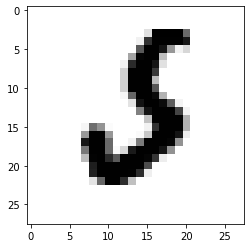

In [5]:
# Test error rate
success = 0
failure = 0

for i in test_dataset_list:
    all_values = i.split(',')
    target = int(all_values[0])
    
    all_values_normalized = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    prediction_list = pct.feedforward(np.asfarray(all_values_normalized))
    prediction = np.argmax(prediction_list)
    
    if target == prediction:
        success = success + 1
    else:
        failure = failure + 1
        
        a = target
        b = prediction
        c = prediction_list
        d = all_values_normalized

print("Prediction fails. (target, predcition) = ", a, b)
print("Prediction = ", c)

im_array = np.asfarray(d).reshape((28,28))
matplotlib.pyplot.imshow(im_array, cmap='Greys', interpolation='None')
        
print("Reconition error rate = ", (failure/(success+failure)))